In [1]:
import fbprophet

Importing plotly failed. Interactive plots will not work.


In [2]:
print('Prophet %s' %fbprophet.__version__)

Prophet 0.7.1


In [3]:
import pandas as pd

In [4]:
path='https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-car-sales.csv'

In [5]:
carSales=pd.read_csv(path)

In [6]:
carSales.head(10)

,Month,Sales
0,1960-01,6550
1,1960-02,8728
2,1960-03,12026
3,1960-04,14395
4,1960-05,14587
5,1960-06,13791
6,1960-07,9498
7,1960-08,8251
8,1960-09,7049
9,1960-10,9545


In [8]:
carSales.shape

(108, 2)

In [9]:
import matplotlib.pyplot as plt

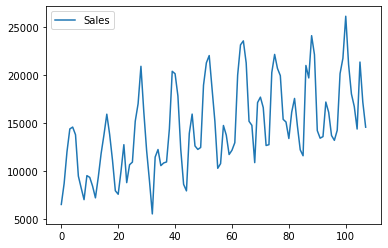

In [14]:
carSales.plot()
plt.show()

In [15]:
carSales.columns=['ds', 'y']

In [19]:
carSales['ds']=pd.to_datetime(carSales['ds'])

In [20]:
carSales.head(10)

,ds,y
0,1960-01-01,6550
1,1960-02-01,8728
2,1960-03-01,12026
3,1960-04-01,14395
4,1960-05-01,14587
5,1960-06-01,13791
6,1960-07-01,9498
7,1960-08-01,8251
8,1960-09-01,7049
9,1960-10-01,9545


In [25]:
from fbprophet import Prophet  #import fbprophet.Prophet as P does not work. Why?

In [27]:
model=Prophet()

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [28]:
model.fit(carSales)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\dsi224\.conda\envs\pytorchenv\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


In [29]:
# Make an In-Sample Forecast  #

In [33]:
# define the period for which we want a prediction
future = list()
for i in range(1, 13):
    date = '1968-%02d' % i
    future.append([date])
    
print(future)

[['1968-01'], ['1968-02'], ['1968-03'], ['1968-04'], ['1968-05'], ['1968-06'], ['1968-07'], ['1968-08'], ['1968-09'], ['1968-10'], ['1968-11'], ['1968-12']]


In [36]:
future = pd.DataFrame(future)
future.columns = ['ds']
future['ds']= pd.to_datetime(future['ds'])

In [37]:
# use the model to make a forecast
forecast = model.predict(future)

C:\Users\dsi224\.conda\envs\pytorchenv\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\dsi224\.conda\envs\pytorchenv\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


In [45]:
print('forecaste shape is:',forecast.shape,'\n')
print(forecast)

forecaste shape is: (12, 16) 

           ds         trend    yhat_lower    yhat_upper   trend_lower  \
0  1968-01-01  17808.744843  12760.867095  15910.649313  17808.744843   
1  1968-02-01  17864.170853  13188.114019  16413.954019  17864.170853   
2  1968-03-01  17916.020991  19262.834302  22409.265052  17916.020991   
3  1968-04-01  17971.447001  21272.534687  24362.881094  17971.447001   
4  1968-05-01  18025.085075  22508.545196  25692.517297  18025.085075   
5  1968-06-01  18080.511085  19463.937787  22702.548900  18080.511085   
6  1968-07-01  18134.149159  16067.278721  19204.426859  18134.149159   
7  1968-08-01  18189.575169  13718.864898  16900.841841  18189.575169   
8  1968-09-01  18245.001179  12145.087143  15310.960921  18245.001179   
9  1968-10-01  18298.639253  16601.194487  19826.266567  18298.639253   
10 1968-11-01  18354.065263  15895.516720  19143.839566  18354.065263   
11 1968-12-01  18407.703337  14224.141007  17217.824793  18407.703337   

     trend_upper  a

In [46]:
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())

          ds          yhat    yhat_lower    yhat_upper
0 1968-01-01  14344.429315  12760.867095  15910.649313
1 1968-02-01  14911.718770  13188.114019  16413.954019
2 1968-03-01  20859.142961  19262.834302  22409.265052
3 1968-04-01  22883.352978  21272.534687  24362.881094
4 1968-05-01  24183.139264  22508.545196  25692.517297


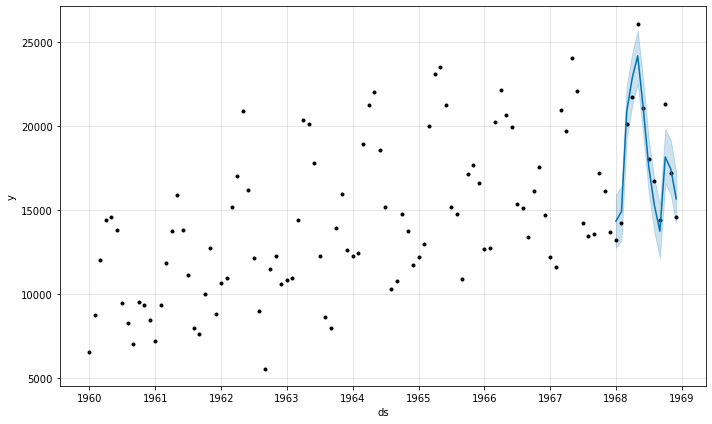

In [48]:
# plot forecast
model.plot(forecast)
plt.show()

In [49]:
# Make an Out-of-Sample Forecast

In [51]:
# define the period for which we want a prediction
future = list()
for i in range(1, 13):
    date = '1969-%02d' % i
    future.append([date])
future = pd.DataFrame(future)
future.columns = ['ds']
future['ds']= pd.to_datetime(future['ds'])

In [52]:
# use the model to make a forecast
forecast = model.predict(future)

C:\Users\dsi224\.conda\envs\pytorchenv\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\dsi224\.conda\envs\pytorchenv\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


In [53]:
# summarize the forecast
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())

          ds          yhat    yhat_lower    yhat_upper
0 1969-01-01  15396.026630  13777.920693  16911.508595
1 1969-02-01  16165.838547  14626.460035  17733.388089
2 1969-03-01  21369.121163  19832.546881  22752.407183
3 1969-04-01  23494.793981  21901.292359  25083.868634
4 1969-05-01  25004.900023  23314.624831  26466.003604


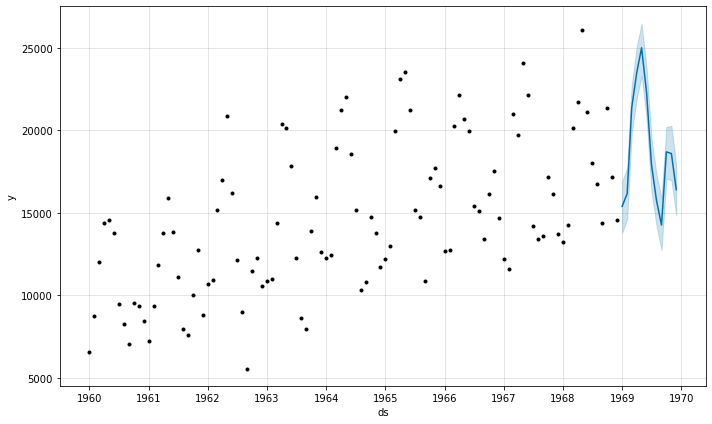

In [54]:
# plot forecast
model.plot(forecast)
plt.show()

In [55]:
# Manually Evaluate Forecast Model
# This is same as holding some of the data from the end for predictions.

In [56]:
# create test dataset, remove last 12 months
carSales_train = carSales.drop(carSales.index[-12:])
print(carSales_train.tail())

           ds      y
91 1967-08-01  13434
92 1967-09-01  13598
93 1967-10-01  17187
94 1967-11-01  16119
95 1967-12-01  13713


In [57]:
carSales.tail()

,ds,y
103,1968-08-01,16722
104,1968-09-01,14385
105,1968-10-01,21342
106,1968-11-01,17180
107,1968-12-01,14577


In [58]:
from sklearn.metrics import mean_absolute_error

In [59]:
y_true = carSales['y'][-12:].values

In [60]:
# use the model to make a forecast
forecast = model.predict(future)

C:\Users\dsi224\.conda\envs\pytorchenv\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\dsi224\.conda\envs\pytorchenv\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


In [61]:
y_pred = forecast['yhat'].values

In [62]:
mae = mean_absolute_error(y_true, y_pred)

In [66]:
print('Mean Absolute Error in forcasted data: %0.3f' %mae)

Mean Absolute Error in forcasted data: 1370.695


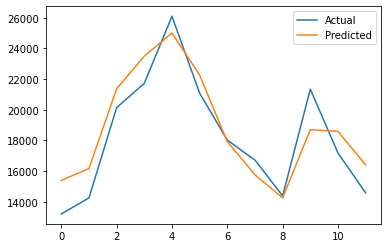

In [67]:
plt.plot(y_true, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.show()